In [1]:
from SciExpeM_API.SciExpeM import SciExpeM
import matplotlib.pyplot as plt
import scienceplots
my_sciexpem = SciExpeM(username=, password=)

In [37]:
mechs = [366, 368] # skeletal1, skeletal3
LFS_DMM = [2351,2357,2360,3304,3306,3307,3308,]
T0_LFS_DMM = [298,328,358,298,298,298,373]
LFS_OME2 = [2368,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,]
T0_LFS_OME2 = [383,388,393,401,393,393,393,393,473,473,473,]
LFS_OME3 = [2385,2386,2387,2388,2389]
LFS_OME4 = [2393,2394,2395,]
EXP = LFS_DMM

In [38]:
dict_forparity = dict.fromkeys(mechs + ['exp', 'unity'])
for key in dict_forparity.keys():
    dict_forparity[key] = []
    
for expid in EXP:
    exp1 = my_sciexpem.filterDatabase(model_name='Experiment', id = expid)[0]
    lfs = exp1.data_columns[0].data
    # eqr = exp1.data_columns[1].data
    dict_forparity['exp'].append(max(lfs))
    # loop over simul
    for mech in mechs:
        results = my_sciexpem.filterDatabase(model_name='Execution', chemModel = mech, experiment=expid)[0]
        for col in results.execution_columns:
            if col.label == 'Speed':
                dict_forparity[mech].append(max(col.data))

mintot = min([min(vect) for vect in dict_forparity.values() if len(vect) > 0])-1
maxtot = max([max(vect) for vect in dict_forparity.values() if len(vect) > 0])+1
dict_forparity['unity'] = [mintot, maxtot]

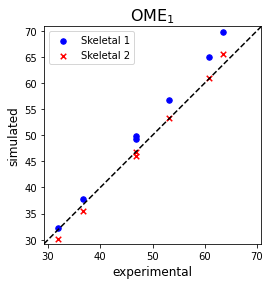

In [39]:
#plt.style.use(['science','nature'])
fig, axes = plt.subplots(1, 1)

axes.set_xlabel('experimental', fontsize=12)
axes.set_ylabel('simulated', fontsize=12)

exp = dict_forparity['exp']
colors = ['blue', 'red']
labels = ['Skeletal 1', 'Skeletal 2']
markers = ['o','x']
for i, mech in enumerate(mechs):
    simul = dict_forparity[mech]
    axes.scatter(exp, simul, label = labels[i], color = colors[i], marker = markers[i], s = 30)
axes.plot(dict_forparity['unity'], dict_forparity['unity'], color = 'black', linestyle = '--')
axes.set_xlim(dict_forparity['unity'])
axes.set_ylim(dict_forparity['unity'])
legend = axes.legend(labels)
axes.set_aspect('equal')
axes.title.set_text("OME$_1$")
axes.title.set_size(16)
figname='ome1.pdf'
plt.savefig(r'C:\Users\lpratalimaffei\Desktop\OneDrive - Politecnico di Milano\Luna\Universita\WORKSHOP_CONFERENZE\2023_09_ICE-OMEs\figure\{}'.format(figname),dpi=300)

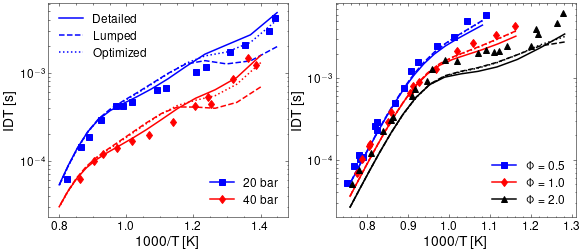

In [55]:
cm = 1/2.54

plt.style.use(['science','nature'])

plt.rcParams.update({
    #"font.sans-serif": ["Helvetica"],  # specify font here
    #"font.family": "sans-serif",   # specify font family here
    "axes.labelsize":14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
    })          # specify font size here

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(24*cm,10*cm))

ax1.title.set_size(24)
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax1.set_xlabel('1000/T [K]')
ax1.set_ylabel('IDT [s]')

ax1.semilogy(1000/x20, y20, 's', color = 'blue', label = '20 bar', markersize = 6)
ax1.semilogy(1000/xdet20, ydet20, label = 'Detailed', color = 'blue', linestyle = '-', linewidth=1.5)
ax1.semilogy(1000/xlump20, ylump20, label = 'Lumped', color = 'blue', linestyle = '--', linewidth=1.5)
ax1.semilogy(1000/xopt20, yopt20, label = 'Optimized', color = 'blue', linestyle = ':', linewidth=1.5)

ax1.semilogy(1000/x40, y40, 'd', color = 'red', label = '40 bar', markersize = 6)
ax1.semilogy(1000/xdet40, ydet40, label = 'Detailed', color = 'red', linestyle = '-', linewidth=1.5)
ax1.semilogy(1000/xlump40, ylump40, label = 'Lumped', color = 'red', linestyle = '--', linewidth=1.5)
ax1.semilogy(1000/xopt40, yopt40, label = 'Optimized', color = 'red', linestyle = ':', linewidth=1.5)

legend1=ax1.legend(handles=[matplotlib.lines.Line2D([], [], linestyle='-', marker='s', markersize=6, color='blue', linewidth=1.5), 
                    matplotlib.lines.Line2D([], [], linestyle='-', marker='d', markersize=6, color='red', linewidth=1.5)], 
                    labels=['20 bar','40 bar'],
                    loc = 4)
legend2=ax1.legend(handles=[matplotlib.lines.Line2D([], [], linestyle='-', color='blue', linewidth=1.5), 
                    matplotlib.lines.Line2D([], [], linestyle='--', color='blue', linewidth=1.5), 
                    matplotlib.lines.Line2D([], [], linestyle=':', color='blue', linewidth=1.5)], 
                    labels=['Detailed','Lumped','Optimized'],
                    loc = 2)
ax1.add_artist(legend1)

ax2.title.set_size(24)
#ax.set_xlim(XLIM)
#ax.set_ylim(YLIM)
ax2.set_xlabel('1000/T [K]')
ax2.set_ylabel('IDT [s]')

ax2.semilogy(1000/x905, y905, 's', color = 'blue', label = '$\Phi=0.5$', markersize = 6)
ax2.semilogy(1000/xdet905, ydet905, label = 'Detailed', color = 'blue', linestyle = '-', linewidth=1.5)
ax2.semilogy(1000/xlump905, ylump905, label = 'Lumped', color = 'blue', linestyle = '--', linewidth=1.5)
ax2.semilogy(1000/xopt905, yopt905, label = 'Optimized', color = 'blue', linestyle = ':', linewidth=1.5)

ax2.semilogy(1000/x910, y910, 'd', color = 'red', label = '$\Phi=1.0$', markersize = 6)
ax2.semilogy(1000/xdet910, ydet910, label = 'Detailed', color = 'red', linestyle = '-', linewidth=1.5)
ax2.semilogy(1000/xlump910, ylump910, label = 'Lumped', color = 'red', linestyle = '--', linewidth=1.5)
ax2.semilogy(1000/xopt910, yopt910, label = 'Optimized', color = 'red', linestyle = ':', linewidth=1.5)

ax2.semilogy(1000/x920, y920, '^', color = 'black', label = '$\Phi=2.0$', markersize = 6)
ax2.semilogy(1000/xdet920, ydet920, label = 'Detailed', color = 'black', linestyle = '-', linewidth=1.5)
ax2.semilogy(1000/xlump920, ylump920, label = 'Lumped', color = 'black', linestyle = '--', linewidth=1.5)
ax2.semilogy(1000/xopt920, yopt920, label = 'Optimized', color = 'black', linestyle = ':', linewidth=1.5)

ax2.legend(handles=[matplotlib.lines.Line2D([], [], linestyle='-', marker='s', markersize=6, color='blue', linewidth=1.5), 
                    matplotlib.lines.Line2D([], [], linestyle='-', marker='d', markersize=6, color='red', linewidth=1.5), 
                    matplotlib.lines.Line2D([], [], linestyle='-', marker='^', markersize=6, color='black', linewidth=1.5)], 
                    labels=['$\Phi=0.5$','$\Phi=1.0$','$\Phi=2.0$'],
                    loc = 4)

if SAVE == 1:
    plt.savefig('/Users/alessandropegurri/Desktop/OME/ICE/figures/IDTs.jpg',dpi=300)
plt.show()